# Predicting Loan Approval Using KNN and Decision Trees

### Import essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

#### Load dataset

In [2]:
data = pd.read_csv('dataset/loan_approval_dataset.csv')
data.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [3]:
data.shape

(4269, 13)

Dataset has 4269 rows and 13 columns.

In [4]:
data.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

#### Data Cleaning

In [5]:
# Check missing values
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

Missing data can have a severe impact on building predictive models because the missing values might be contain some vital information which could help in making better predictions.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
# Checking Duplicates
data.duplicated().sum()

np.int64(0)

In [8]:
data.drop(columns=['loan_id'], inplace=True)

In [9]:
data.head(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [10]:
data.shape

(4269, 12)

In [11]:
# Numerical data summary
data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [12]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [13]:
data.columns = data.columns.str.strip()
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

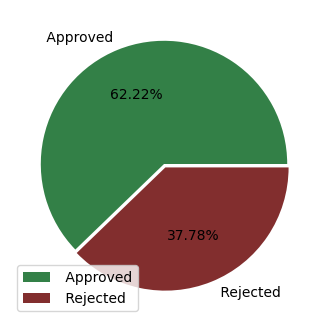

In [14]:
plt.figure(figsize=(8,4))
explode = (0,0.03)
plt.pie(
    data['loan_status'].value_counts().values,
    labels=data['loan_status'].value_counts().index,
    explode=explode,
    autopct="%1.2f%%",
    colors=['#338047','#822e2e']
)
plt.legend()
plt.show()

In [15]:
import seaborn as sns
import numpy as np

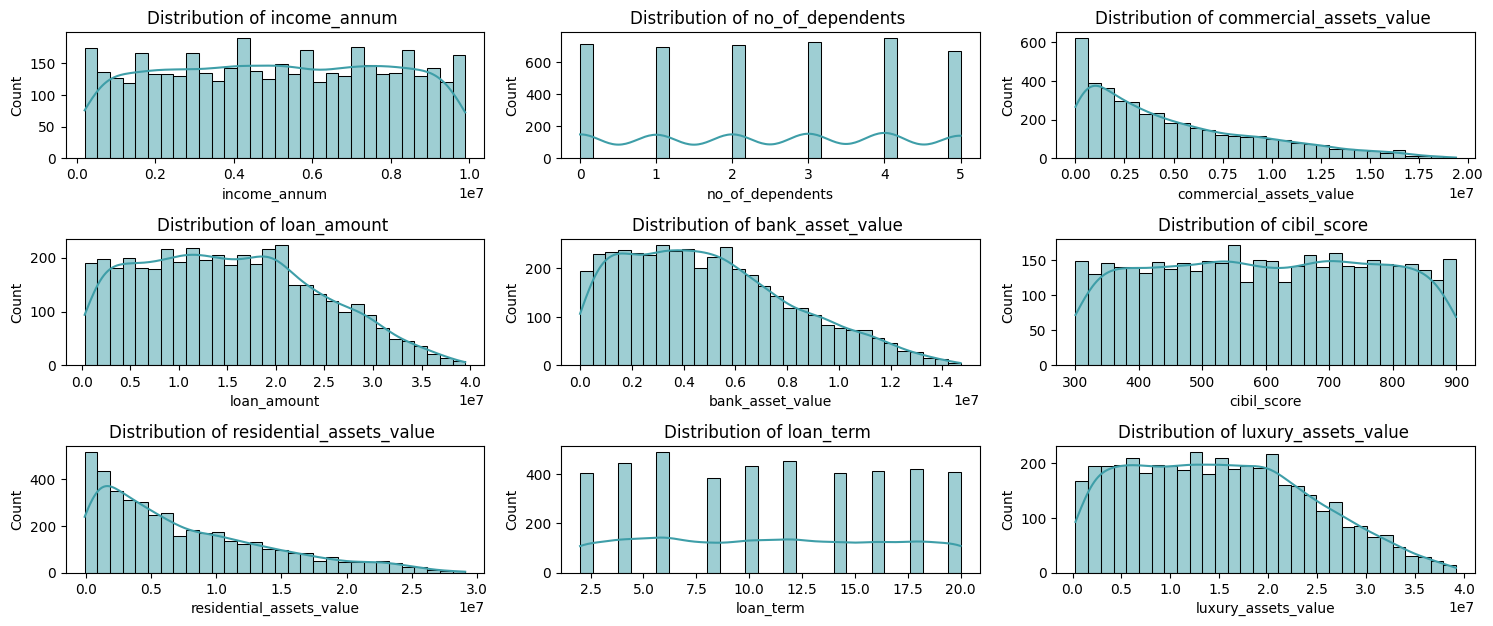

In [16]:
# Distribution Of Numerical Columns
numerical_col = data[np.random.permutation(
    data.select_dtypes(include=['int64', 'float64']).columns)]

plt.figure(figsize=(15,8))

for i,col in enumerate(numerical_col,1):
    plt.subplot(4,3,i)
    sns.histplot(data[col],kde=True , bins=30 , color='#3e9ea8')
    plt.title(f'Distribution of {col} ')

plt.tight_layout()
plt.show()

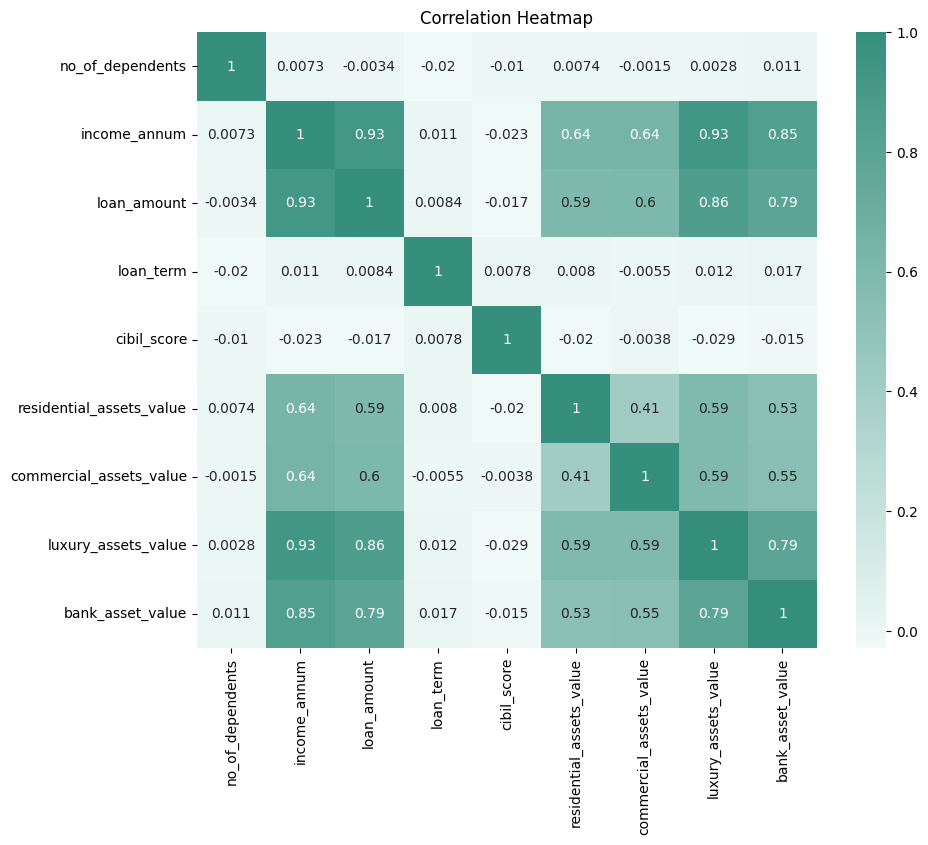

In [17]:
# Heatmap
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list(
    "my_cmap",
    ["#f0faf8", "#368f7d"]
)

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap=custom_cmap)
plt.title('Correlation Heatmap')
plt.show()

#### Feature Engineering

In [18]:
# Define mapping dictionaries for label encoding
education_map = {'Not Graduate': 0, 'Graduate': 1}
self_employed_map = {'No': 0, 'Yes': 1}
loan_status_map = {'Rejected': 0, 'Approved': 1}

In [19]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [20]:
data.tail(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [21]:
data['education'] = data['education'].str.strip()
data['self_employed'] = data['self_employed'].str.strip()
data['loan_status'] = data['loan_status'].str.strip()

In [22]:
# Apply label encoding
data['education'] = data['education'].map(education_map)
data['self_employed'] = data['self_employed'].map(self_employed_map)
data['loan_status'] = data['loan_status'].map(loan_status_map)

In [23]:
data.head(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [24]:
# Apply Power Transformation to specified numerical columns
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
cols_to_transform = ['loan_amount', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
data[cols_to_transform] = pt.fit_transform(data[cols_to_transform])

In [25]:
data.head(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,1.460706,12,778,-0.751598,1.868391,0.853329,0.943431,1
1,0,0,1,4100000,-0.186207,8,417,-0.696278,-0.372538,-0.585799,-0.349390,0
2,3,1,0,9100000,1.444721,20,506,0.031896,0.227494,1.711457,1.906244,0
3,3,1,0,8200000,1.524235,8,467,1.584531,-0.050621,0.905697,0.920694,0
4,5,0,1,9800000,0.987203,20,382,0.804696,0.856714,1.410576,0.185363,0


In [26]:
X = data.drop(columns=['loan_status'])
y = data['loan_status']

In [27]:
X.head(2)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,1,0,9600000,1.460706,12,778,-0.751598,1.868391,0.853329,0.943431
1,0,0,1,4100000,-0.186207,8,417,-0.696278,-0.372538,-0.585799,-0.349390


In [28]:
y.head(2)

0    1
1    0
Name: loan_status, dtype: int64

#### Split Dataset

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def model_evaluator(model):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    # Display
    print("Model Evaluation Metrics")
    print("-------------------------")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }
    

#### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
model_knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform', 
    algorithm='brute', 
    leaf_size=20, 
    p=2
)

model_evaluator(model_knn)

Model Evaluation Metrics
-------------------------
Accuracy : 0.9403
Precision: 0.9669
Recall   : 0.9360
F1-Score : 0.9512


{'accuracy': 0.9402810304449649,
 'precision': 0.9669260700389105,
 'recall': 0.935969868173258,
 'f1_score': 0.9511961722488038}

#### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model_dtc = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None, #all node,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

model_evaluator(model_dtc)

Model Evaluation Metrics
-------------------------
Accuracy : 0.9801
Precision: 0.9831
Recall   : 0.9849
F1-Score : 0.9840


{'accuracy': 0.9800936768149883,
 'precision': 0.9830827067669173,
 'recall': 0.9849340866290018,
 'f1_score': 0.9840075258701787}

## Discussions

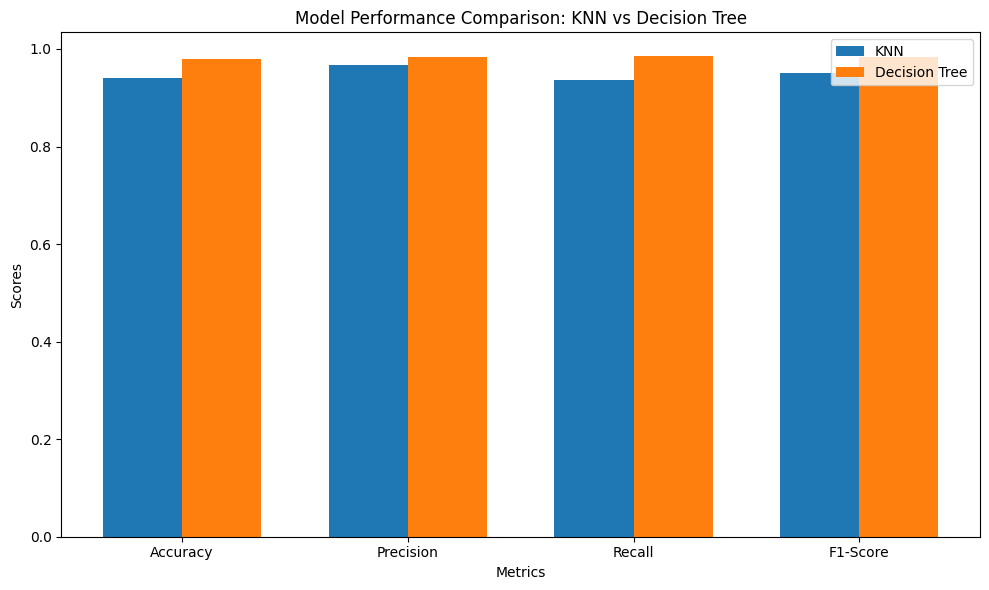

In [35]:
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
knn_scores = [0.9403, 0.9669, 0.9360, 0.9512]
dt_scores = [0.9801, 0.9831, 0.9849, 0.9840]

# X positions
x = np.arange(len(metrics))
width = 0.35  # width of each bar

plt.figure(figsize=(10, 6))

# Bars for KNN & Decision Tree
plt.bar(x - width/2, knn_scores, width, label="KNN")
plt.bar(x + width/2, dt_scores, width, label="Decision Tree")

# Labels & Title
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Model Performance Comparison: KNN vs Decision Tree")
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.show()

Raw metrics show the Decision Tree outperforming KNN across all key indicators.

### Features that are most important
- CIBIL Score – strongest indicator of repayment reliability.
- Income Annually – capacity to repay.
- Loan Amount vs Income – debt-to-income ratio effect.
- Residential / Commercial Asset Values – collateral strength.
- Luxury Assets Value – discretionary wealth → financial stability.
- Self-Employed – higher default variability → risk factor.
- Loan Term – longer terms increase bank’s exposure duration.
- No. of Dependents – financial burden impact.
- Education – correlates with employment stability.

### KNN issues
- Performs poorly with unscaled, noisy numeric data.
- Slow at prediction time as dataset grows.
- Low interpretability, making it unsuitable for regulated banking decisions.

### Decision Tree advantages
- Handles nonlinear financial patterns well.
- Highly interpretable for auditors and regulators.
- Fast, low-cost predictions.
- Strong recall (fewer good borrowers rejected) and high precision (fewer risky borrowers approved).

### Recommendation
Use the Decision Tree as the primary model, ideally enhanced with pruning or upgraded to RandomForest/XGBoost for better stability and generalization.

### Strategic Insights for the Bank

#### Improve Screening Accuracy
##### Better Inputs -> Better Model
- Tighten CIBIL thresholds to reduce noisy, low-quality cases.
- Add DTI as a key engineered feature to boost predictive power.

##### Faster Decisions -> Model as Rules
- Convert Decision Tree splits into automated pre-screening and instant decision rules for real-time approvals.

##### Model-Driven Segmentation
- Use asset-related feature importance to personalize loan limits and pricing directly from model insights.

##### Probability-Based Risk Control
- Use model output probabilities to place applicants into low-, medium-, and high-risk buckets for dynamic underwriting.